## Machine Learning LAB - Assessment 4
### Jeevan Yohan Varghese - 20BCE0083

### 1. Implement Hierarchical clustering.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

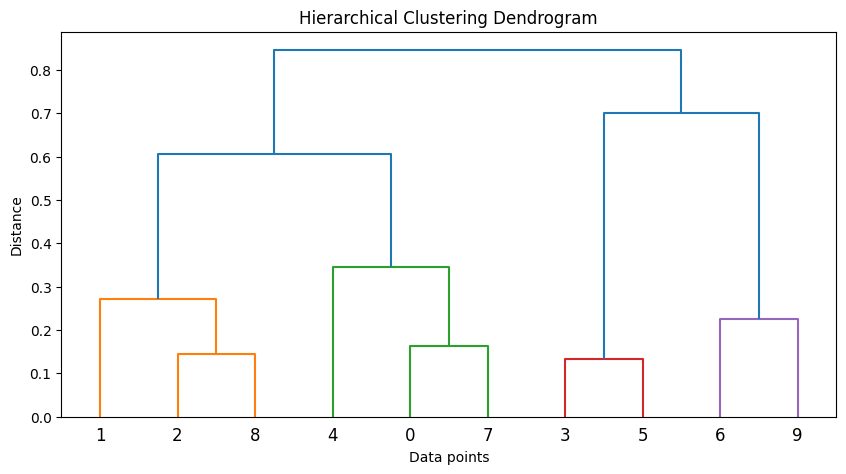

In [33]:
X = np.random.rand(10, 2)

# Distance matrix
dist_matrix = pdist(X)

# Perform hierarchical clustering
linkage_matrix = linkage(dist_matrix, method='complete')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, color_threshold=0.5*max(linkage_matrix[:, 2]))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


### 2. Implement Gaussian Mixture Model Using the Expectation Maximization

In [34]:
from sklearn.mixture import GaussianMixture
import numpy as np

np.random.seed(42)
x = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(5, 1, 500)]).reshape(-1, 1)

# GMM with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)

# Training
gmm.fit(x)

# print the means and standard deviations of the two Gaussian components
print("Means:", gmm.means_.flatten())
print("Standard Deviations:", np.sqrt(gmm.covariances_).flatten())


Means: [-4.06425046e-03  5.02442983e+00]
Standard Deviations: [0.96338193 0.98477776]


### 3. Evaluating ML algorithm with balanced and unbalanced datasets.

In [23]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [26]:
#balanced dataset
X_bal, y_bal = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.5, 0.5], random_state=123)

#unbalanced dataset
X_unbal, y_unbal = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.9, 0.1], random_state=123)


X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=123)
X_train_unbal, X_test_unbal, y_train_unbal, y_test_unbal = train_test_split(X_unbal, y_unbal, test_size=0.2, random_state=123)

# Training on balanced dataset
model_balanced = LogisticRegression(random_state=123)
model_balanced.fit(X_train_bal, y_train_bal)

# Testing on balanced dataset
y_pred_bal = model_balanced.predict(X_test_bal)

# Balanced model - evaluation 
acc_bal = accuracy_score(y_test_bal, y_pred_bal)
print("Accuracy on balanced dataset: {:.2f}%".format(acc_bal * 100))
print(classification_report(y_test_bal, y_pred_bal))


Accuracy on balanced dataset: 95.50%
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.97      0.94      0.95       101

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



In [30]:

# training on unbalanced data
model_unbalanced = LogisticRegression(random_state=123)
model_unbalanced.fit(X_train_unbal, y_train_unbal)

# testing on unbalanced data
y_pred_unbalanced = model_unbalanced.predict(X_test_unbal)

# Unbalanced model - evaluation
acc_unbalanced = accuracy_score(y_test_unbal, y_pred_unbalanced)
print("Accuracy on unbalanced dataset: {:.2f}%".format(acc_unbalanced * 100))
print(classification_report(y_test_unbal, y_pred_unbalanced))

Accuracy on unbalanced dataset: 95.00%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       177
           1       0.84      0.70      0.76        23

    accuracy                           0.95       200
   macro avg       0.90      0.84      0.87       200
weighted avg       0.95      0.95      0.95       200



### 4. Implement K‐means Clustering.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


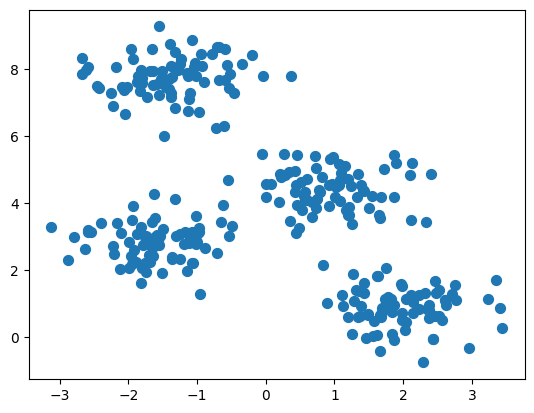

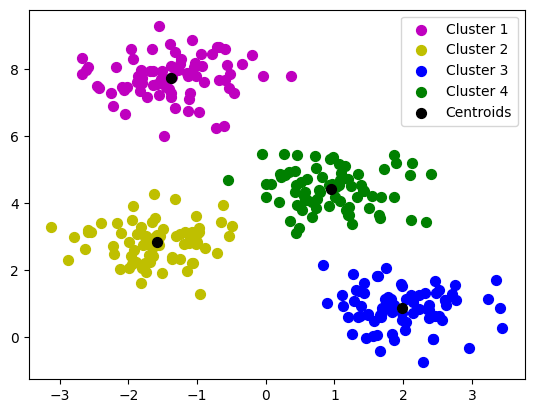

In [6]:

# dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

k = 4

kmeans = KMeans(n_clusters=k,n_init=10)

kmeans.fit(X)

centroids = kmeans.cluster_centers_

# Get the labels of the clusters
labels = kmeans.labels_

# Plot the clusters and the centroids
colors = ['m', 'y', 'b', 'g']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], label='Cluster {}'.format(i+1))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='.', c='black', label='Centroids')
plt.legend()
plt.show()


### 5. Implement K Mode clustering

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 4.0
Best run was number 1


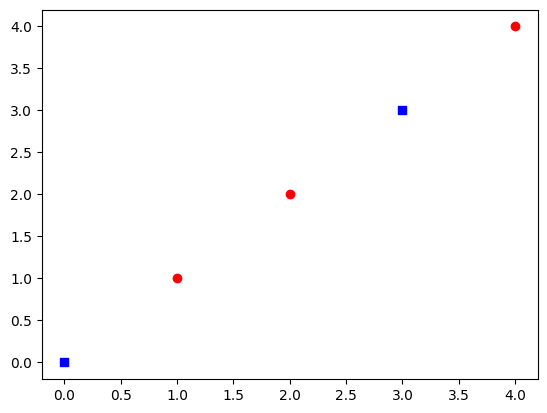

In [3]:
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt

# random data set
np.random.seed(42)
x = np.array([
    ['Red', 'Small', 'High'],
    ['Blue', 'Medium', 'Low'],
    ['Green', 'Medium', 'Medium'],
    ['Red', 'Large', 'Low'],
    ['Blue', 'Medium', 'Low']
])

# K=2
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(x)

colors = ['r', 'b']
markers = ['o', 's']
for i in range(len(x)):
    plt.scatter(i, i, color=colors[clusters[i]], marker=markers[clusters[i]])
plt.show()


### 6. Compare the performance of following Machine Learning algorithms 
for the <b>“National
Institute of Diabetes and Digestive and Kidney Diseases”</b> dataset available in the Kaggle
database.
<ol type="a">
    <li>K-nearest neighbour classifier,</li>
    <li>Decision tree classifier,</li>
    <li>Support Vector Machine.</li>
</ol>  

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("diabetes.csv")

# Splitting for training and testing
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracies of the classifiers
print("Accuracy of K-nearest neighbor classifier:", accuracy_knn)
print("Accuracy of decision tree classifier:", accuracy_dt)
print("Accuracy of support vector machine:", accuracy_svm)


Accuracy of K-nearest neighbor classifier: 0.6623376623376623
Accuracy of decision tree classifier: 0.7727272727272727
Accuracy of support vector machine: 0.7662337662337663


### 7.  Implement Principle Component Analysis for Dimensionality Reduction

In [9]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Covariance
        cov = np.cov(X.T)
        # Eigen Vectors and Eigen Values of COV matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # sorting eigen vectors
        indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, indices]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)


In [20]:
import numpy as np
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data



In [21]:

# Using PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Comparing
print("Original data shape:", X.shape)
print("Reduced data shape:", X_reduced.shape)
print("\n")
print("Original")
print(X)
print("\n")
print("Reduced")
print(X_reduced)

Original data shape: (150, 4)
Reduced data shape: (150, 2)


Original
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]